In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN

In [2]:
df_matches = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/matches_cleaned.csv')
df_delivery = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/delivery_cleaned.csv')
df_orange_cap = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/orange_cap.csv')

In [3]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [4]:
df_delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,No,No Dismissal,N
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,No,No Dismissal,N
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,No,No Dismissal,N
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,No,No Dismissal,N
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,No,No Dismissal,N


In [5]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   team1            1095 non-null   object
 7   team2            1095 non-null   object
 8   toss_winner      1095 non-null   object
 9   toss_decision    1095 non-null   object
 10  winner           1095 non-null   object
 11  result           1095 non-null   object
 12  result_margin    1095 non-null   object
 13  target_runs      1095 non-null   object
 14  target_overs     1095 non-null   object
 15  super_over       1095 non-null   object
 16  method           1095 non-null   object
 17  umpire1          1095 non-null   

In [6]:
df_matches.head()

,id,season,city,date,match_type,player_of_match,team1,team2,toss_winner,toss_decision,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,seasons,venue
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,140.0,223.0,20.0,N,No DLS,Asad Rauf,RE Koertzen,2008,M Chinnaswamy Stadium
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,runs,33.0,241.0,20.0,N,No DLS,MR Benson,SL Shastri,2008,Punjab Cricket Association Stadium
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,wickets,9.0,130.0,20.0,N,No DLS,Aleem Dar,GA Pratapkumar,2008,Feroz Shah Kotla
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,wickets,5.0,166.0,20.0,N,No DLS,SJ Davis,DJ Harper,2008,Wankhede Stadium
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,wickets,5.0,111.0,20.0,N,No DLS,BF Bowden,K Hariharan,2008,Eden Gardens


In [7]:
df_orange_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         268 non-null    object 
 1   Season         268 non-null    object 
 2   Matches        268 non-null    int64  
 3   Innings        268 non-null    int64  
 4   Not Outs       268 non-null    object 
 5   Runs           268 non-null    object 
 6   Highest Score  268 non-null    object 
 7   Average        268 non-null    float64
 8   Balls Faced    268 non-null    int64  
 9   Strike Rate    268 non-null    float64
 10  100s           268 non-null    object 
 11  50s            268 non-null    object 
 12  Ducks          268 non-null    object 
 13  Fours          268 non-null    int64  
 14  Sixes          268 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 31.5+ KB


In [8]:
df_orange_cap.head()

,Player,Season,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,Ducks,Fours,Sixes
0,S Dhawan (DC),2020-2020,17,17,3,618,106*,44.14,427,144.73,2,4,4,67,12
1,DA Warner (SRH),2020-2020,16,16,2,548,85*,39.14,407,134.64,-,4,-,52,14
2,SS Iyer (DC),2020-2020,17,17,2,519,88*,34.60,421,123.27,-,3,-,40,16
3,Ishan Kishan (MI),2020-2020,14,13,4,516,99,57.33,354,145.76,-,4,1,36,30
4,Q de Kock (MI),2020-2020,16,16,2,503,78*,35.92,358,140.50,-,4,1,46,22


In [9]:
df_orange_cap['Season'] = df_orange_cap['Season'].str[:4]

In [10]:
df_orange_cap

,Player,Season,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,Ducks,Fours,Sixes
0,S Dhawan (DC),2020,17,17,3,618,106*,44.14,427,144.73,2,4,4,67,12
1,DA Warner (SRH),2020,16,16,2,548,85*,39.14,407,134.64,-,4,-,52,14
2,SS Iyer (DC),2020,17,17,2,519,88*,34.60,421,123.27,-,3,-,40,16
3,Ishan Kishan (MI),2020,14,13,4,516,99,57.33,354,145.76,-,4,1,36,30
4,Q de Kock (MI),2020,16,16,2,503,78*,35.92,358,140.50,-,4,1,46,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,CV Varun (KKR),2021,17,3,2,2,2*,2.00,4,50.00,-,-,1,0,0
264,DL Chahar (CSK),2021,15,2,2,1,1*,0.00,1,100.00,-,-,-,0,0
265,TA Boult (MI),2021,14,4,4,1,1*,0.00,4,25.00,-,-,-,0,0
266,PP Chawla (MI),2021,1,1,-,-,-,0.00,2,0.00,-,-,1,0,0


In [11]:
# Clean the 'Highest Score' column by removing the asterisk '*'
df_orange_cap['Highest Score'] = df_orange_cap['Highest Score'].str.replace('*', '', regex=False)

# Convert the cleaned 'Highest Score' column to numeric (if you need it as an integer/float for further analysis)
df_orange_cap['Highest Score'] = pd.to_numeric(df_orange_cap['Highest Score'], errors='coerce')

In [12]:
df_orange_cap

,Player,Season,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,Ducks,Fours,Sixes
0,S Dhawan (DC),2020,17,17,3,618,106.0,44.14,427,144.73,2,4,4,67,12
1,DA Warner (SRH),2020,16,16,2,548,85.0,39.14,407,134.64,-,4,-,52,14
2,SS Iyer (DC),2020,17,17,2,519,88.0,34.60,421,123.27,-,3,-,40,16
3,Ishan Kishan (MI),2020,14,13,4,516,99.0,57.33,354,145.76,-,4,1,36,30
4,Q de Kock (MI),2020,16,16,2,503,78.0,35.92,358,140.50,-,4,1,46,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,CV Varun (KKR),2021,17,3,2,2,2.0,2.00,4,50.00,-,-,1,0,0
264,DL Chahar (CSK),2021,15,2,2,1,1.0,0.00,1,100.00,-,-,-,0,0
265,TA Boult (MI),2021,14,4,4,1,1.0,0.00,4,25.00,-,-,-,0,0
266,PP Chawla (MI),2021,1,1,-,-,NaN,0.00,2,0.00,-,-,1,0,0


In [13]:
# id, season, date, result_margin, target_runs, target_overs, seasons
#match_id, inning, over, ball, batsman_runs, extra_runs, total_runs, is_wicket
df_matches_selected = df_matches[['result_margin', 'target_runs', 'target_overs', 'seasons']].dropna()
df_delivery_selected = df_delivery[['inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket']].dropna()
df_orange_cap_selected = df_orange_cap.drop('Player', axis=1)

In [14]:
df_orange_cap_selected

,Season,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,Ducks,Fours,Sixes
0,2020,17,17,3,618,106.0,44.14,427,144.73,2,4,4,67,12
1,2020,16,16,2,548,85.0,39.14,407,134.64,-,4,-,52,14
2,2020,17,17,2,519,88.0,34.60,421,123.27,-,3,-,40,16
3,2020,14,13,4,516,99.0,57.33,354,145.76,-,4,1,36,30
4,2020,16,16,2,503,78.0,35.92,358,140.50,-,4,1,46,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2021,17,3,2,2,2.0,2.00,4,50.00,-,-,1,0,0
264,2021,15,2,2,1,1.0,0.00,1,100.00,-,-,-,0,0
265,2021,14,4,4,1,1.0,0.00,4,25.00,-,-,-,0,0
266,2021,1,1,-,-,NaN,0.00,2,0.00,-,-,1,0,0


In [15]:
df_orange_cap_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         268 non-null    object 
 1   Matches        268 non-null    int64  
 2   Innings        268 non-null    int64  
 3   Not Outs       268 non-null    object 
 4   Runs           268 non-null    object 
 5   Highest Score  263 non-null    float64
 6   Average        268 non-null    float64
 7   Balls Faced    268 non-null    int64  
 8   Strike Rate    268 non-null    float64
 9   100s           268 non-null    object 
 10  50s            268 non-null    object 
 11  Ducks          268 non-null    object 
 12  Fours          268 non-null    int64  
 13  Sixes          268 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 29.4+ KB


In [16]:
# Step 1: Replace '-' with NaN
df_orange_cap_selected.replace('-', np.nan, inplace=True)

# Step 2: Convert necessary columns to numeric after replacing '-' with NaN
df_orange_cap_selected['Not Outs'] = pd.to_numeric(df_orange_cap_selected['Not Outs'], errors='coerce')
df_orange_cap_selected['Runs'] = pd.to_numeric(df_orange_cap_selected['Runs'], errors='coerce')
df_orange_cap_selected['100s'] = pd.to_numeric(df_orange_cap_selected['100s'], errors='coerce')
df_orange_cap_selected['50s'] = pd.to_numeric(df_orange_cap_selected['50s'], errors='coerce')
df_orange_cap_selected['Ducks'] = pd.to_numeric(df_orange_cap_selected['Ducks'], errors='coerce')

df_orange_cap_selected.fillna(0, inplace=True)
scaler = StandardScaler()
df_orange_cap_selected_scaled = scaler.fit_transform(df_orange_cap_selected)

In [17]:
df_orange_cap_selected_scaled

array([[-1.403939  ,  1.07502876,  1.57775788, ...,  3.91577444,
         2.64939459,  0.30604952],
       [-1.403939  ,  0.84287106,  1.3802618 , ..., -0.73285258,
         1.84763561,  0.51555469],
       [-1.403939  ,  1.07502876,  1.57775788, ..., -0.73285258,
         1.20622843,  0.72505986],
       ...,
       [-0.67897628,  0.37855566, -0.98969119, ..., -0.73285258,
        -0.93179551, -0.95098147],
       [-0.67897628, -2.63949448, -1.58217943, ...,  0.42930417,
        -0.93179551, -0.95098147],
       [-0.67897628, -2.17517907, -1.38468335, ...,  1.59146093,
        -0.93179551, -0.95098147]])

In [18]:
df_matches_selected

,result_margin,target_runs,target_overs,seasons
0,140.0,223.0,20.0,2008
1,33.0,241.0,20.0,2008
2,9.0,130.0,20.0,2008
3,5.0,166.0,20.0,2008
4,5.0,111.0,20.0,2008
...,...,...,...,...
1090,4.0,215.0,20.0,2024
1091,8.0,160.0,20.0,2024
1092,4.0,173.0,20.0,2024
1093,36.0,176.0,20.0,2024


In [19]:
df_delivery_selected

,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
0,1,0,1,0,1,1,0
1,1,0,2,0,0,0,0
2,1,0,3,0,1,1,0
3,1,0,4,0,0,0,0
4,1,0,5,0,0,0,0
...,...,...,...,...,...,...,...
260915,2,9,5,1,0,1,0
260916,2,9,6,1,0,1,0
260917,2,10,1,1,0,1,0
260918,2,10,2,1,0,1,0


In [20]:
df_matches_selected['result_margin'] = pd.to_numeric(df_matches_selected['result_margin'], errors='coerce')
df_matches_selected['target_runs'] = pd.to_numeric(df_matches_selected['target_runs'], errors='coerce')
df_matches_selected['target_overs'] = pd.to_numeric(df_matches_selected['target_overs'], errors='coerce')

In [21]:
df_matches_scaled = scaler.fit_transform(df_matches_selected)

In [22]:
print(df_matches_selected.dtypes)

result_margin    float64
target_runs      float64
target_overs     float64
seasons            int64
dtype: object


In [23]:
df_delivery_scaled = scaler.fit_transform(df_delivery_selected)

In [24]:
print(df_delivery_scaled)

[[-0.96197915 -1.61831995 -1.44606418 ...  2.71567046 -0.20462641
  -0.22852584]
 [-0.96197915 -1.61831995 -0.89507479 ... -0.19753335 -0.81947649
  -0.22852584]
 [-0.96197915 -1.61831995 -0.3440854  ...  2.71567046 -0.20462641
  -0.22852584]
 ...
 [ 1.02750746  0.14116766 -1.44606418 ... -0.19753335 -0.20462641
  -0.22852584]
 [ 1.02750746  0.14116766 -0.89507479 ... -0.19753335 -0.20462641
  -0.22852584]
 [ 1.02750746  0.14116766 -0.3440854  ... -0.19753335 -0.20462641
  -0.22852584]]


In [25]:
df_matches_scaled

array([[ 5.63617207,  1.71544299,  0.15227901, -1.64338758],
       [ 0.72280282,  2.2541758 ,  0.15227901, -1.64338758],
       [-0.3792613 , -1.06800983,  0.15227901, -1.64338758],
       ...,
       [-0.608858  ,  0.21896298,  0.15227901,  1.59241265],
       [ 0.86056084,  0.30875178,  0.15227901,  1.59241265],
       [-0.42518064, -1.54688343,  0.15227901,  1.59241265]])

In [26]:
imputer = SimpleImputer(strategy='mean')

df_orange_cap_filled = imputer.fit_transform(df_orange_cap_selected_scaled)
df_delivery_filled = imputer.fit_transform(df_delivery_scaled)
df_matches_filled = imputer.fit_transform(df_matches_scaled)

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with the specified number of components for each dataset

# Orange Cap Holders: 8 components to retain 95% variance
pca_orange_cap = PCA(n_components=8)
df_orange_cap_pca = pca_orange_cap.fit_transform(df_orange_cap_filled)

# IPL Delivery Data: 6 components to retain 95% variance
pca_delivery = PCA(n_components=6)
df_delivery_pca = pca_delivery.fit_transform(df_delivery_filled)

# IPL Matches Data: 4 components to retain 95% variance
pca_matches = PCA(n_components=4)
df_matches_pca = pca_matches.fit_transform(df_matches_filled)

# Explained variance ratios
print("Explained variance by components for Orange Cap Holders:", pca_orange_cap.explained_variance_ratio_)
print("Explained variance by components for IPL Delivery Data:", pca_delivery.explained_variance_ratio_)
print("Explained variance by components for IPL Matches Data:", pca_matches.explained_variance_ratio_)

# Total variance explained
print("Total variance explained for Orange Cap Holders:", pca_orange_cap.explained_variance_ratio_.sum())
print("Total variance explained for IPL Delivery Data:", pca_delivery.explained_variance_ratio_.sum())
print("Total variance explained for IPL Matches Data:", pca_matches.explained_variance_ratio_.sum())

Explained variance by components for Orange Cap Holders: [0.53317612 0.10289747 0.09209781 0.07631188 0.05688483 0.04898848
 0.0355946  0.01697211]
Explained variance by components for IPL Delivery Data: [0.29264275 0.15607588 0.14762156 0.14290443 0.13985189 0.12090349]
Explained variance by components for IPL Matches Data: [0.4026754  0.25221491 0.23439686 0.11071284]
Total variance explained for Orange Cap Holders: 0.962923296464555
Total variance explained for IPL Delivery Data: 1.0000000000000002
Total variance explained for IPL Matches Data: 0.9999999999999999


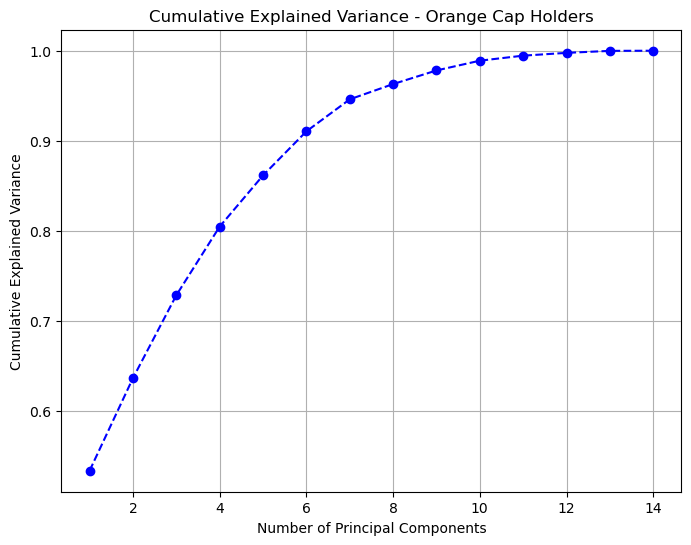

Number of components needed to retain 95% variance for Orange Cap Holders: 8


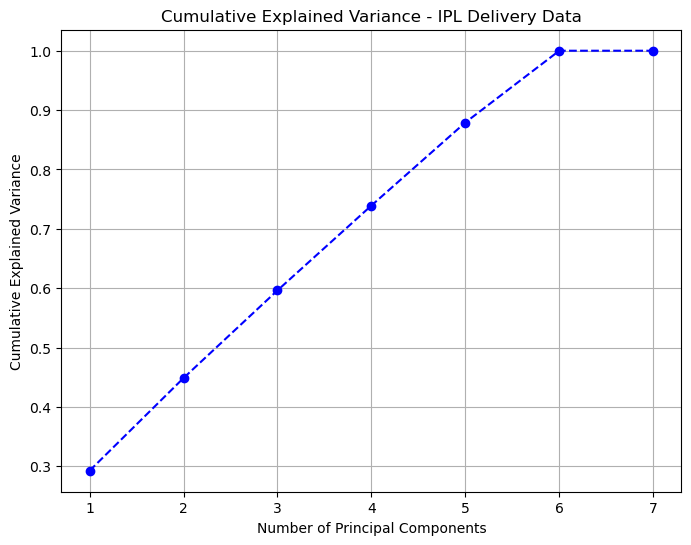

Number of components needed to retain 95% variance for IPL Delivery Data: 6


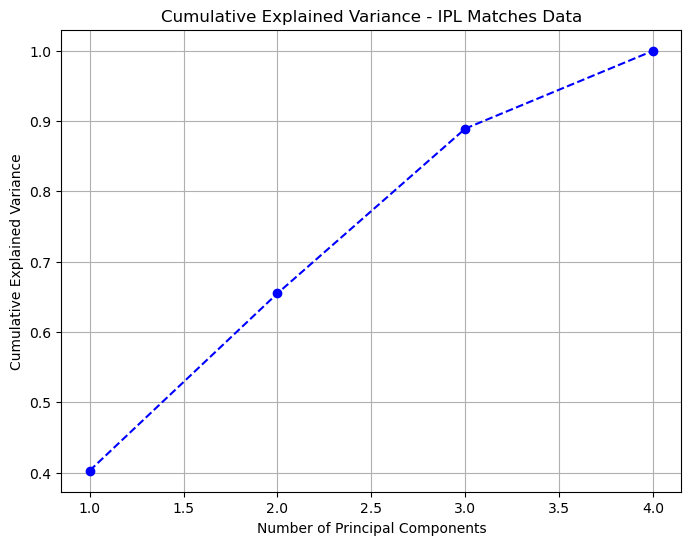

Number of components needed to retain 95% variance for IPL Matches Data: 4


In [28]:
def plot_cumulative_variance(data, title):
    # Fit PCA for all components
    pca = PCA().fit(data)
    
    # Calculate cumulative explained variance
    cumulative_variance = pca.explained_variance_ratio_.cumsum()
    
    # Plot cumulative explained variance
    plt.figure(figsize=(8,6))
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
    plt.title(f'Cumulative Explained Variance - {title}')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid()
    plt.show()
    
    # Print number of components required to retain 95% variance
    components_needed = (cumulative_variance >= 0.95).argmax() + 1
    print(f'Number of components needed to retain 95% variance for {title}: {components_needed}')

# Apply to each dataset
plot_cumulative_variance(df_orange_cap_filled, 'Orange Cap Holders')
plot_cumulative_variance(df_delivery_filled, 'IPL Delivery Data')
plot_cumulative_variance(df_matches_filled, 'IPL Matches Data')


In [29]:
df_orange_cap_selected.head()

,Season,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,Ducks,Fours,Sixes
0,2020,17,17,3.0,618.0,106.0,44.14,427,144.73,2.0,4.0,4.0,67,12
1,2020,16,16,2.0,548.0,85.0,39.14,407,134.64,0.0,4.0,0.0,52,14
2,2020,17,17,2.0,519.0,88.0,34.60,421,123.27,0.0,3.0,0.0,40,16
3,2020,14,13,4.0,516.0,99.0,57.33,354,145.76,0.0,4.0,1.0,36,30
4,2020,16,16,2.0,503.0,78.0,35.92,358,140.50,0.0,4.0,1.0,46,22


In [30]:
df_delivery_selected.head()

,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
0,1,0,1,0,1,1,0
1,1,0,2,0,0,0,0
2,1,0,3,0,1,1,0
3,1,0,4,0,0,0,0
4,1,0,5,0,0,0,0


In [31]:
df_matches_selected.head()

,result_margin,target_runs,target_overs,seasons
0,140.0,223.0,20.0,2008
1,33.0,241.0,20.0,2008
2,9.0,130.0,20.0,2008
3,5.0,166.0,20.0,2008
4,5.0,111.0,20.0,2008


/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

[4355.000000000006, 3234.151050974421, 2325.4665533750976, 1548.4452483999069, 1316.3013221805047, 1119.0124547540652, 1008.9404033875701, 908.460065179812, 824.1587015831594, 762.4826388846927]


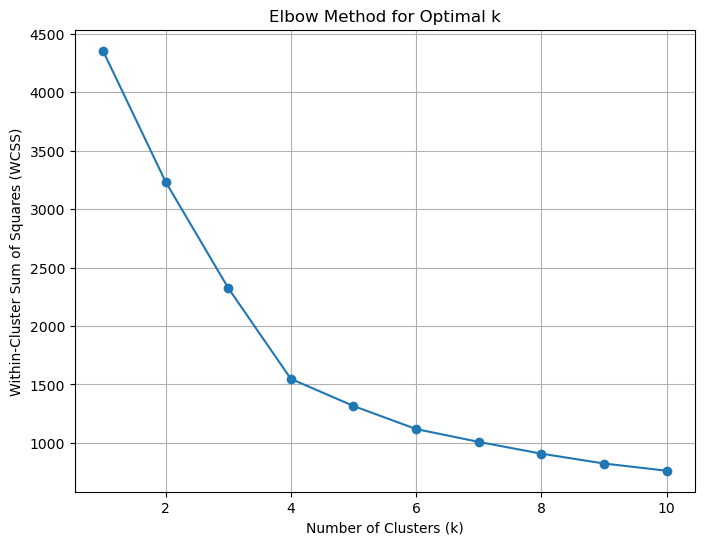

In [32]:
# Elbow method to determine the optimal number of clusters
def elbow_method(data, max_k=10):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Inertia is the WCSS
    print(wcss)

    # Plot the WCSS for each k
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.show()

# Apply the elbow method to the PCA-transformed data
elbow_method(df_matches_pca)

/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

[1826440.0000000005, 1396747.2621385348, 1132731.0952148063, 929917.6046636456, 766566.1122081333, 712093.3872348496, 625470.1110258923, 543786.6872991187, 500160.43698754907, 457546.8604486635]


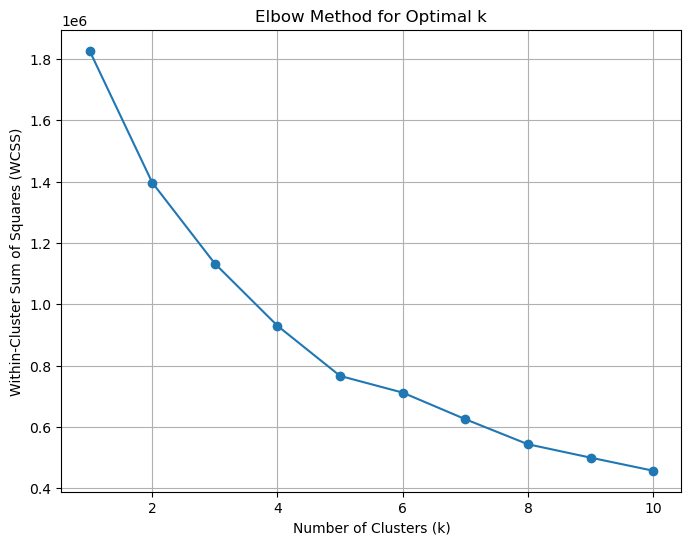

In [33]:
elbow_method(df_delivery_pca)

/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

[3612.8882083350136, 2114.8097245787044, 1811.0511692150549, 1588.5259141265183, 1429.553238061958, 1331.7234250244032, 1256.0010651212433, 1172.1039091673524, 1119.4637219005647, 1040.2082339748922]


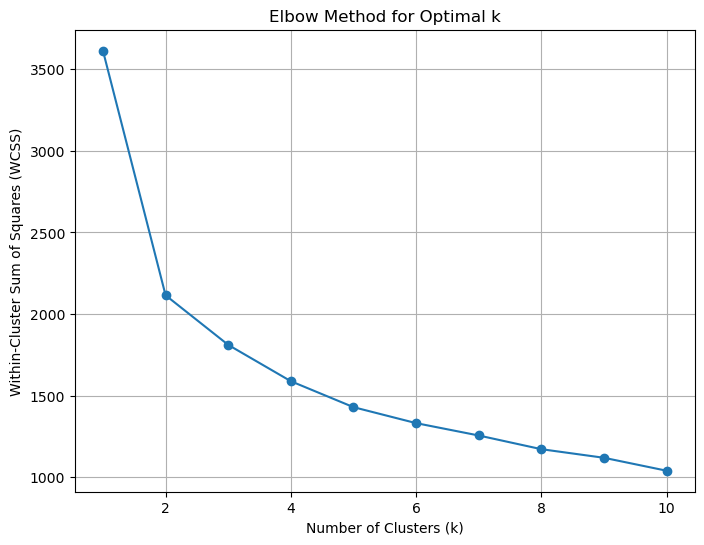

In [34]:
elbow_method(df_orange_cap_pca)

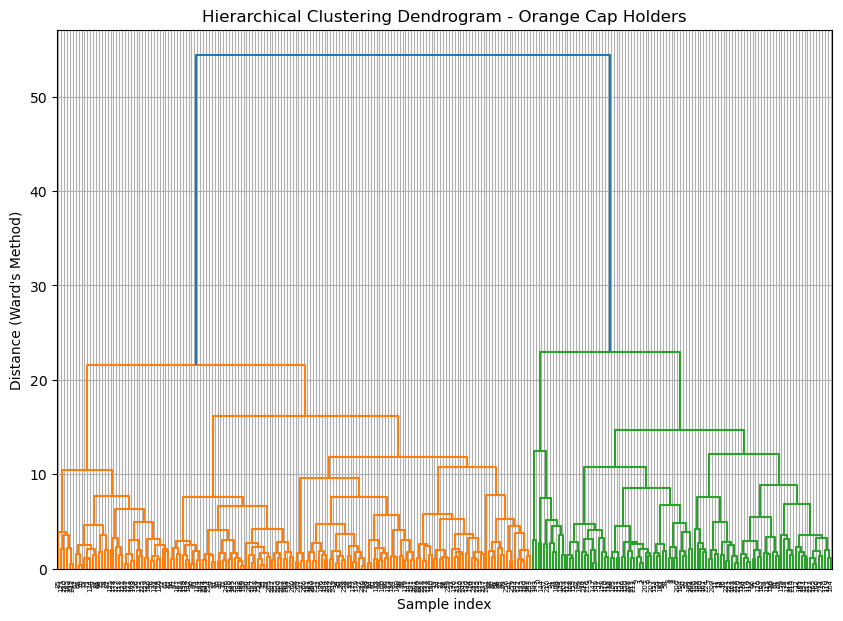

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Function to perform hierarchical clustering and plot the dendrogram
def hierarchical_clustering(data, title):
    # Perform hierarchical clustering using the 'ward' method and Euclidean distance
    Z = linkage(data, method='ward', metric='euclidean')

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering Dendrogram - {title}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance (Ward\'s Method)')
    plt.grid(True)
    plt.show()

    return Z

# Apply hierarchical clustering to the Orange Cap PCA data
Z_orange_cap = hierarchical_clustering(df_orange_cap_pca, 'Orange Cap Holders')

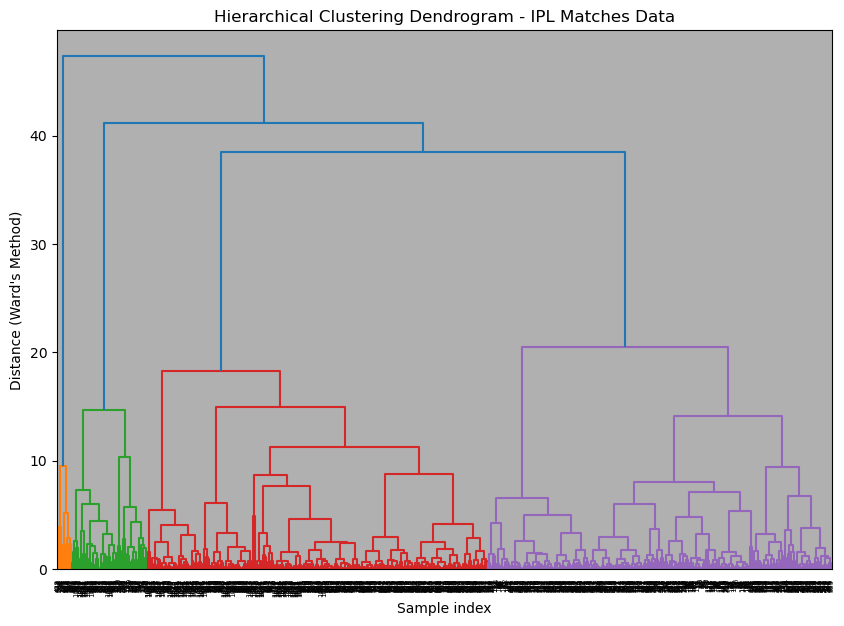

In [36]:
Z_matches = hierarchical_clustering(df_matches_pca, 'IPL Matches Data')

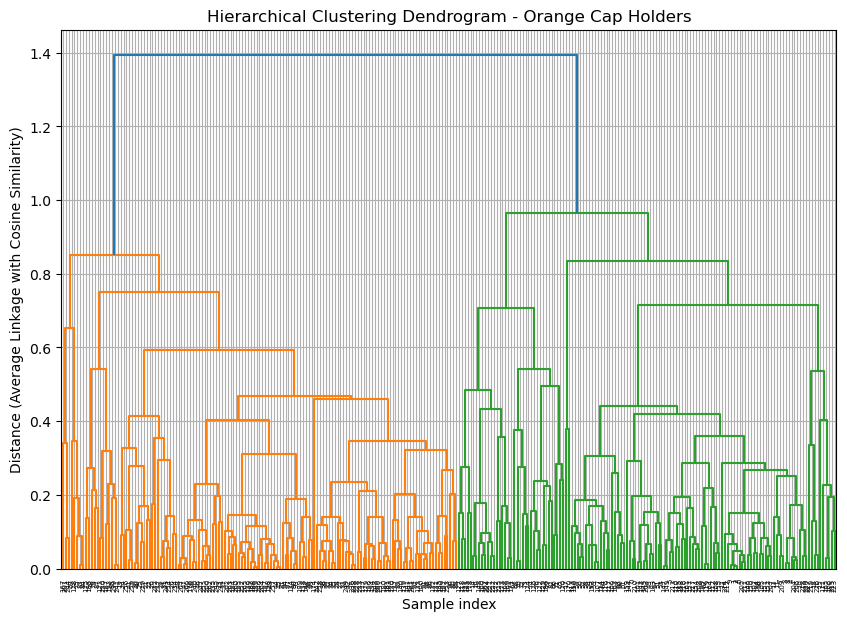

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Function to perform hierarchical clustering with cosine similarity and plot the dendrogram
def hierarchical_clustering_cosine(data, title):
    # Perform hierarchical clustering using the 'average' method and cosine similarity
    Z = linkage(data, method='average', metric='cosine')

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering Dendrogram - {title}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance (Average Linkage with Cosine Similarity)')
    plt.grid(True)
    plt.show()

    return Z

# Apply hierarchical clustering to the Orange Cap PCA data
Z_orange_cap = hierarchical_clustering_cosine(df_orange_cap_pca, 'Orange Cap Holders')

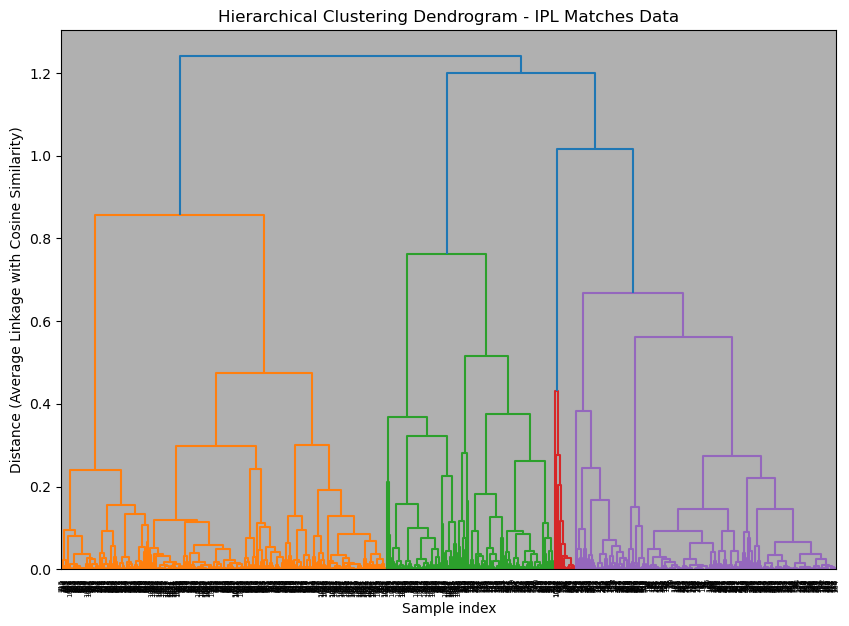

In [38]:
# Apply hierarchical clustering to the IPL Matches PCA data
Z_matches = hierarchical_clustering_cosine(df_matches_pca, 'IPL Matches Data')

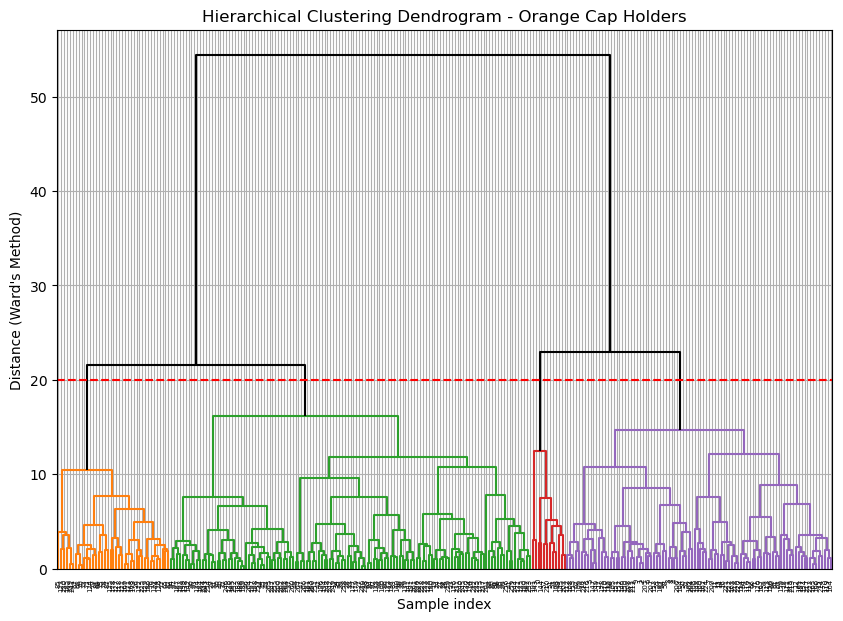

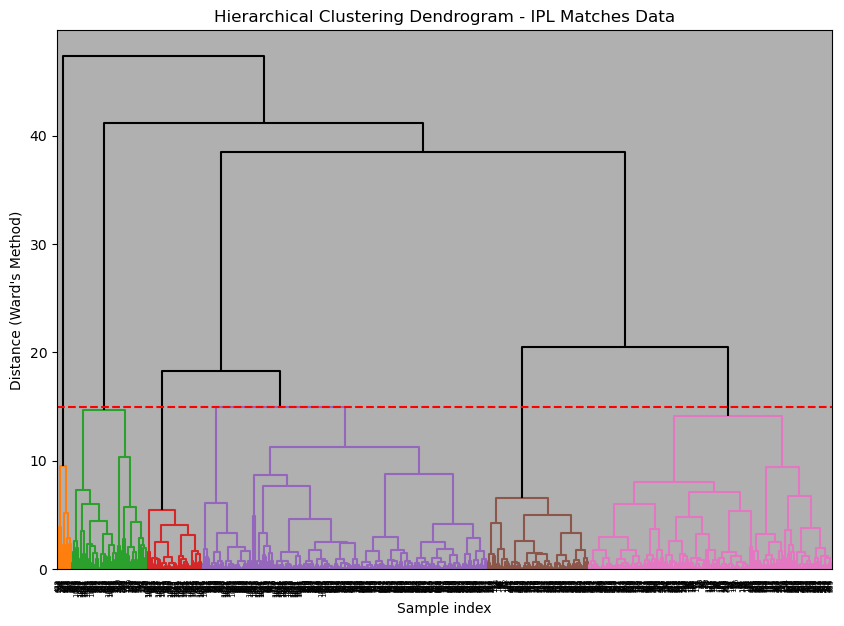

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Function to perform hierarchical clustering with Ward's method and plot the dendrogram with merger lines
def hierarchical_clustering_with_merger_lines(data, title, threshold=None):
    # Perform hierarchical clustering using the 'ward' method and Euclidean distance
    Z = linkage(data, method='ward', metric='euclidean')

    # Plot the dendrogram with merger lines
    plt.figure(figsize=(10, 7))
    dendrogram(Z, color_threshold=threshold, above_threshold_color='black')
    plt.title(f'Hierarchical Clustering Dendrogram - {title}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance (Ward\'s Method)')
    plt.grid(True)

    # Draw a horizontal line at the specified threshold if provided
    if threshold:
        plt.axhline(y=threshold, color='r', linestyle='--')

    plt.show()

    return Z

# Define the threshold (height at which the merger happens)
threshold_orange_cap = 20  # Example value for threshold

# Apply hierarchical clustering to the Orange Cap PCA data and draw merger lines
Z_orange_cap = hierarchical_clustering_with_merger_lines(df_orange_cap_pca, 'Orange Cap Holders', threshold_orange_cap)

# Apply hierarchical clustering to the IPL Matches PCA data and draw merger lines
threshold_matches = 15  # Example value for threshold
Z_matches = hierarchical_clustering_with_merger_lines(df_matches_pca, 'IPL Matches Data', threshold_matches)


/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


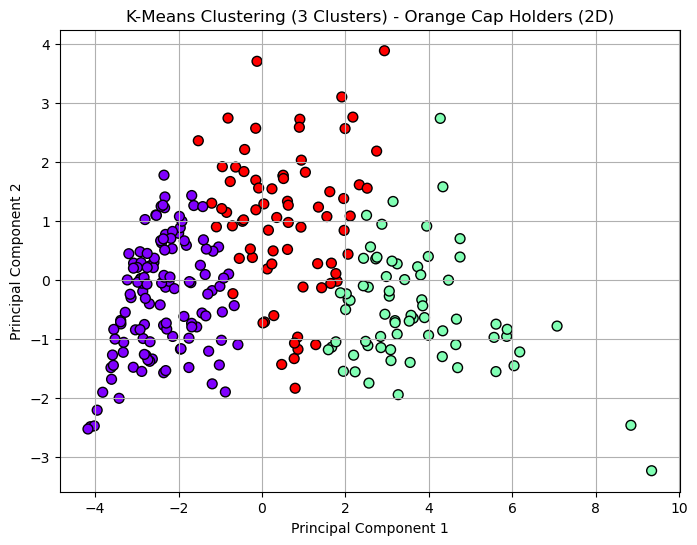

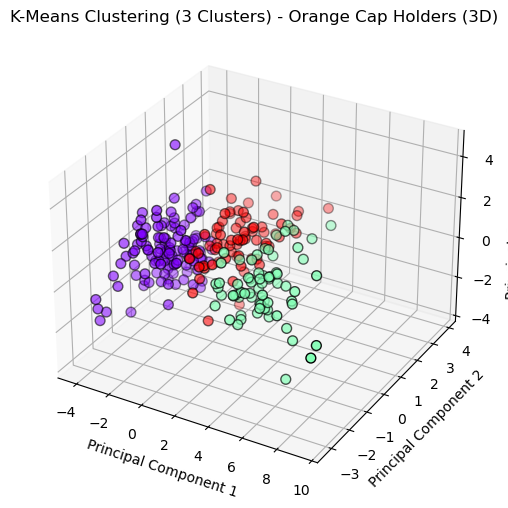

In [40]:
# Function to apply K-Means and plot 2D and 3D
def plot_kmeans_clusters_2d_3d(data, n_clusters, title):
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)

    # 2D Plot (using first two principal components)
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow', edgecolor='k', s=50)
    plt.title(f'K-Means Clustering ({n_clusters} Clusters) - {title} (2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

    # 3D Plot (using first three principal components)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=clusters, cmap='rainbow', edgecolor='k', s=50)
    ax.set_title(f'K-Means Clustering ({n_clusters} Clusters) - {title} (3D)')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()

# K-Means Clustering for Orange Cap Holders (3 clusters)
plot_kmeans_clusters_2d_3d(df_orange_cap_pca, 3, 'Orange Cap Holders')

/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


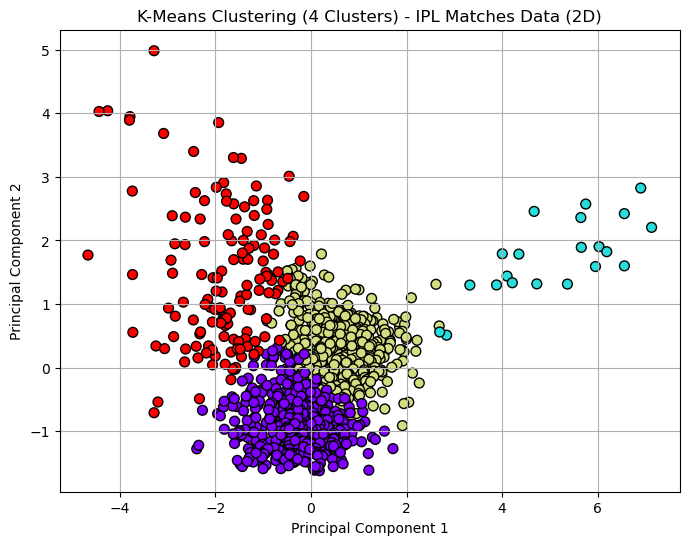

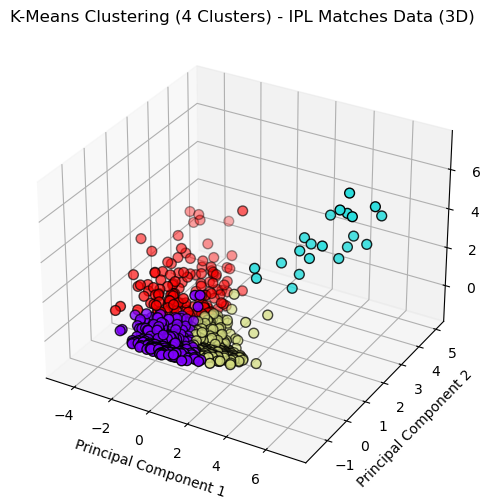

In [41]:
# K-Means Clustering for IPL Matches Data (4 clusters)
plot_kmeans_clusters_2d_3d(df_matches_pca, 4, 'IPL Matches Data')

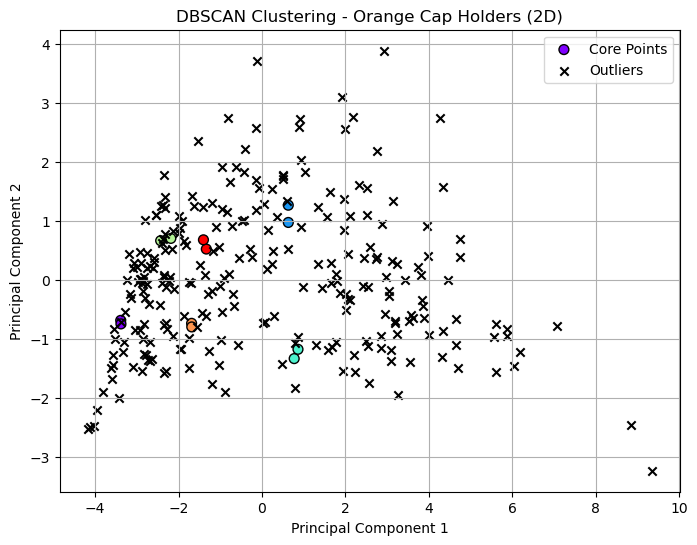

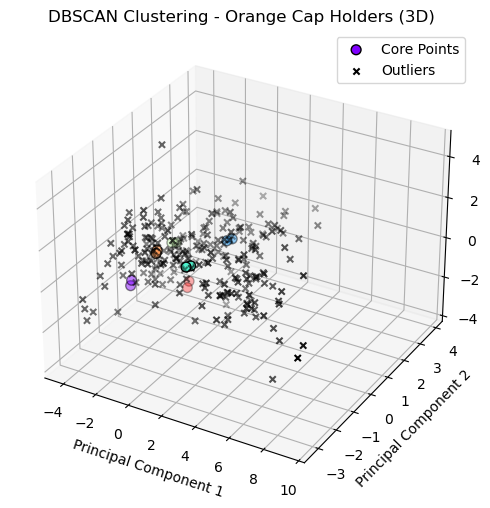

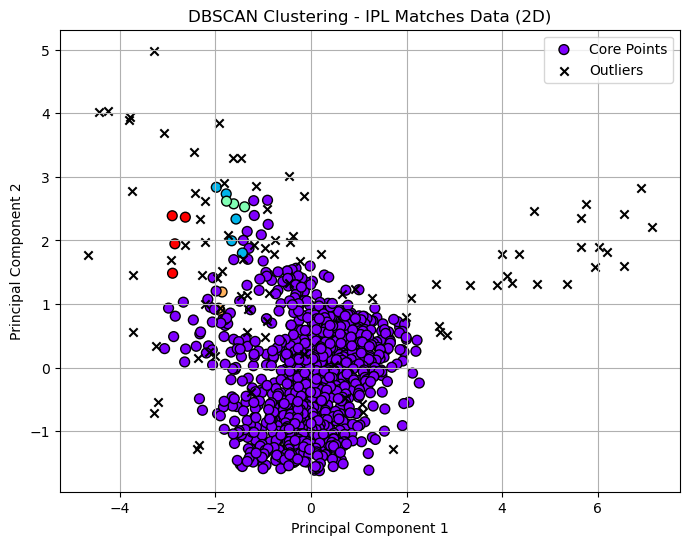

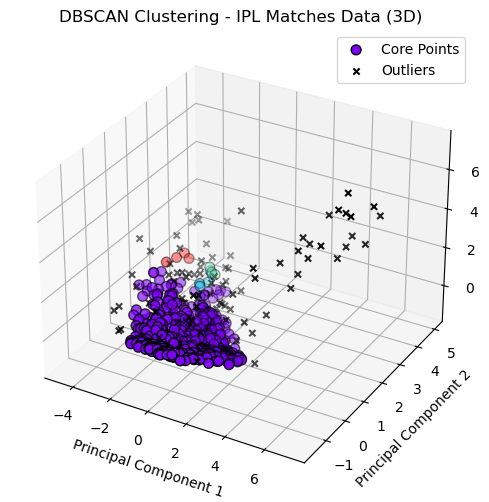

In [42]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to apply DBSCAN and plot 2D and 3D
def plot_dbscan_clusters_2d_3d(data, eps, min_samples, title):
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    
    # Identify outliers (noise points are labeled as -1 by DBSCAN)
    outliers = clusters == -1
    core_points = clusters != -1

    # 2D Plot (using first two principal components)
    plt.figure(figsize=(8, 6))
    plt.scatter(data[core_points, 0], data[core_points, 1], c=clusters[core_points], cmap='rainbow', edgecolor='k', s=50, label='Core Points')
    plt.scatter(data[outliers, 0], data[outliers, 1], c='black', marker='x', label='Outliers')
    plt.title(f'DBSCAN Clustering - {title} (2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 3D Plot (using first three principal components)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[core_points, 0], data[core_points, 1], data[core_points, 2], c=clusters[core_points], cmap='rainbow', edgecolor='k', s=50, label='Core Points')
    ax.scatter(data[outliers, 0], data[outliers, 1], data[outliers, 2], c='black', marker='x', label='Outliers')
    ax.set_title(f'DBSCAN Clustering - {title} (3D)')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.legend()
    plt.show()

# Apply DBSCAN to the Orange Cap Holders PCA data (choose eps and min_samples based on the dataset structure)
plot_dbscan_clusters_2d_3d(df_orange_cap_pca, eps=0.5, min_samples=2, title='Orange Cap Holders')

# Apply DBSCAN to the IPL Matches PCA data
plot_dbscan_clusters_2d_3d(df_matches_pca, eps=0.5, min_samples=3, title='IPL Matches Data')
